
<div align="center">
<font size='6' color='red'><b>Deep Learning (STAT 946)</b></font>
<br />
<font size='6' color='red'><b>Pytorch tutorial</b></font>
<br />

<font size='3' color='red'><b>September, 2020</b></font>

</div>


# Step 1)  Import libraries and set up necessary parameters

In the following cell we will import the necessary libraries: <br />
The main frameworks are: <br />
<b>1) NumPy:</b> Fundamental package for scientific computing in Python. It provides multidimensional tensor objects and fast linear algebra operators on CPU.<br /> 
<b>2) PyTorch:</b> PyTorch is an open source deep learning platform. It is a library for tensor operations like NumPy. But it also includes several additional features like supporting GPU and other hardware acceleration as well as other efficient tools for AI researchers.<br />
<b>3) matplotlib:</b> Matplotlib is a reach library for visualization in Python.


In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

## Seting device, random seed, and runtime parameters

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Cuda available: ",torch.cuda.is_available())
print("Current device: ",  torch.cuda.current_device())

seed = 2020
torch.manual_seed(seed)
if device.type == 'cuda':
    torch.cuda.manual_seed_all(seed)

Cuda available:  True
Current device:  0


## Parameters

In [10]:
input_size = 28*28
output_size = 10
dropout= 0.1
epochs = 100

# Step 2) Data prepration

### Loading and preparing data

In [11]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST("./data",download=True, train=True, transform=transform)
testset = datasets.MNIST("./data",download=True, train=False, transform=transform)

### Initializing data loader objects

In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

### Plot some samples from dataset

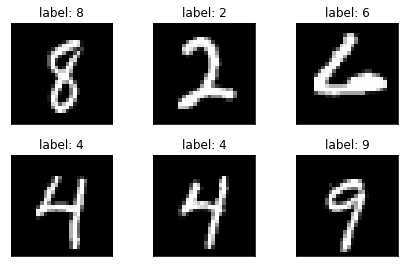

In [13]:
examples = enumerate(testloader)
batch_idx, (images, labels) = next(examples)
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title(f'label: {labels[i].item()}')
  plt.xticks([])
  plt.yticks([])

# Step 3) Model definition

In [14]:
class Network(torch.nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(input_size, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, output_size)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.dropout(F.relu(self.fc1(x)), p=dropout)
        x = F.dropout(F.relu(self.fc2(x)), p=dropout)
        x = F.relu(self.fc3(x))
        x = self.softmax(x)
        return x

# Step 4) Train and evaluation functions

In [15]:
def train(model, dataloader):
    optimizer = optim.Adam(model.parameters(), lr=3e-5)
    model.train()
    running_loss = 0
    total_steps = 0
    for i, (images, labels) in tqdm(enumerate(dataloader)):
        images = images.to(device)
        labels = labels.to(device)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = F.cross_entropy(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
        total_steps += 1
    
    return running_loss/total_steps
    

In [16]:
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    test_loss = 0
    with torch.no_grad():
        for i, (images, labels) in tqdm(enumerate(dataloader)):
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            test_loss += F.cross_entropy(output, labels, reduction='sum').item()
            prd = output.argmax(1)
            correct += torch.sum(labels == prd)

    test_loss /= len(dataloader.dataset)
    # test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
     test_loss, correct, len(dataloader.dataset),
     100. * correct / len(dataloader.dataset)))

# Step 5) Main loop of training

In [17]:
model = Network()
model.to(device)
losses = []
for e in range(epochs):
    print(f"\nepoch {e+1}/{epochs}")
    loss = train(model, trainloader)
    print(f" loss = {loss}")
    losses.append(loss)



1it [00:00,  8.62it/s]


epoch 1/100


938it [00:08, 107.17it/s]
11it [00:00, 109.38it/s]

 loss = 1.8480512874721209

epoch 2/100


938it [00:08, 108.26it/s]
11it [00:00, 105.62it/s]

 loss = 1.7390916437736705

epoch 3/100


938it [00:08, 108.42it/s]
12it [00:00, 111.74it/s]

 loss = 1.7261651228231663

epoch 4/100


938it [00:08, 108.31it/s]
12it [00:00, 111.68it/s]

 loss = 1.718753860322143

epoch 5/100


938it [00:08, 108.77it/s]
12it [00:00, 112.16it/s]

 loss = 1.7132432469681127

epoch 6/100


938it [00:08, 107.41it/s]
11it [00:00, 105.50it/s]

 loss = 1.7080140845862024

epoch 7/100


938it [00:08, 107.93it/s]
11it [00:00, 108.37it/s]

 loss = 1.7037667095788251

epoch 8/100


938it [00:08, 107.25it/s]
10it [00:00, 98.89it/s]

 loss = 1.673092841339518

epoch 9/100


938it [00:08, 107.74it/s]
11it [00:00, 103.42it/s]

 loss = 1.6101661834127106

epoch 10/100


938it [00:08, 108.23it/s]
11it [00:00, 102.47it/s]

 loss = 1.6034642428731614

epoch 11/100


938it [00:08, 108.97it/s]
11it [00:00, 108.90it/s]

 loss = 1.5996361928962186

epoch 12/100


938it [00:08, 107.67it/s]
12it [00:00, 111.36it/s]

 loss = 1.5959668324700296

epoch 13/100


938it [00:08, 107.16it/s]
11it [00:00, 109.67it/s]

 loss = 1.5930471521959122

epoch 14/100


938it [00:08, 108.93it/s]
11it [00:00, 105.96it/s]

 loss = 1.590104613985334

epoch 15/100


938it [00:08, 108.66it/s]
12it [00:00, 112.26it/s]

 loss = 1.5540943304612946

epoch 16/100


938it [00:08, 109.20it/s]
12it [00:00, 111.09it/s]

 loss = 1.5045316687016599

epoch 17/100


938it [00:08, 107.66it/s]
11it [00:00, 104.79it/s]

 loss = 1.4995497161391447

epoch 18/100


938it [00:08, 108.53it/s]
12it [00:00, 111.85it/s]

 loss = 1.4958977530251687

epoch 19/100


938it [00:08, 108.71it/s]
12it [00:00, 113.35it/s]

 loss = 1.493197611018793

epoch 20/100


938it [00:08, 108.37it/s]
11it [00:00, 109.66it/s]

 loss = 1.4911559713420584

epoch 21/100


938it [00:08, 108.69it/s]
10it [00:00, 92.90it/s]

 loss = 1.4891441863482948

epoch 22/100


938it [00:08, 108.20it/s]
12it [00:00, 112.99it/s]

 loss = 1.4874361126915987

epoch 23/100


938it [00:08, 108.92it/s]
11it [00:00, 105.63it/s]

 loss = 1.4862672833999846

epoch 24/100


938it [00:08, 108.45it/s]
12it [00:00, 112.53it/s]

 loss = 1.4848912012602475

epoch 25/100


938it [00:08, 108.80it/s]
10it [00:00, 96.30it/s]

 loss = 1.4837897852031408

epoch 26/100


938it [00:08, 107.81it/s]
11it [00:00, 108.53it/s]

 loss = 1.4826869842594366

epoch 27/100


938it [00:08, 107.88it/s]
11it [00:00, 103.29it/s]

 loss = 1.4816463729465947

epoch 28/100


938it [00:08, 108.69it/s]
12it [00:00, 111.81it/s]

 loss = 1.480672545143282

epoch 29/100


938it [00:08, 107.04it/s]
11it [00:00, 106.21it/s]

 loss = 1.4799709705147408

epoch 30/100


938it [00:08, 106.77it/s]
11it [00:00, 102.64it/s]

 loss = 1.4787996176209277

epoch 31/100


938it [00:08, 108.06it/s]
10it [00:00, 94.63it/s]

 loss = 1.4784046861408615

epoch 32/100


938it [00:08, 107.22it/s]
11it [00:00, 109.60it/s]

 loss = 1.4776178205699555

epoch 33/100


938it [00:08, 109.79it/s]
12it [00:00, 111.11it/s]

 loss = 1.4771812648407177

epoch 34/100


938it [00:08, 108.95it/s]
12it [00:00, 112.29it/s]

 loss = 1.4765593507396642

epoch 35/100


938it [00:08, 108.98it/s]
11it [00:00, 101.01it/s]

 loss = 1.475635106756743

epoch 36/100


938it [00:08, 107.24it/s]
9it [00:00, 87.20it/s]

 loss = 1.475365908288244

epoch 37/100


938it [00:08, 109.23it/s]
11it [00:00, 106.04it/s]

 loss = 1.4746998675596485

epoch 38/100


938it [00:08, 108.45it/s]
12it [00:00, 112.22it/s]

 loss = 1.4745016316615187

epoch 39/100


938it [00:08, 108.07it/s]
12it [00:00, 110.79it/s]

 loss = 1.473799540798293

epoch 40/100


938it [00:08, 108.68it/s]
12it [00:00, 112.12it/s]

 loss = 1.473676071873606

epoch 41/100


938it [00:08, 108.63it/s]
12it [00:00, 111.82it/s]

 loss = 1.4732784227267512

epoch 42/100


938it [00:08, 107.93it/s]
12it [00:00, 111.08it/s]

 loss = 1.472906644918771

epoch 43/100


938it [00:08, 108.35it/s]
12it [00:00, 111.32it/s]

 loss = 1.4723944552163326

epoch 44/100


938it [00:08, 108.35it/s]
11it [00:00, 108.34it/s]

 loss = 1.4721093268028453

epoch 45/100


938it [00:08, 107.24it/s]
11it [00:00, 105.12it/s]

 loss = 1.4720377184943096

epoch 46/100


938it [00:08, 108.15it/s]
12it [00:00, 111.35it/s]

 loss = 1.4715065654915278

epoch 47/100


938it [00:08, 108.50it/s]
12it [00:00, 112.73it/s]

 loss = 1.471305749182508

epoch 48/100


938it [00:08, 107.13it/s]
11it [00:00, 109.02it/s]

 loss = 1.471183904833885

epoch 49/100


938it [00:08, 109.28it/s]
12it [00:00, 111.98it/s]

 loss = 1.4709505135062406

epoch 50/100


938it [00:08, 106.74it/s]
12it [00:00, 112.19it/s]

 loss = 1.4703038478456836

epoch 51/100


938it [00:08, 108.30it/s]
11it [00:00, 109.73it/s]

 loss = 1.4701382637278104

epoch 52/100


938it [00:08, 108.11it/s]
12it [00:00, 113.28it/s]

 loss = 1.4699495307672252

epoch 53/100


938it [00:08, 106.57it/s]
12it [00:00, 105.86it/s]

 loss = 1.469902426195043

epoch 54/100


938it [00:08, 106.73it/s]
11it [00:00, 109.43it/s]

 loss = 1.469409709800281

epoch 55/100


938it [00:08, 109.45it/s]
12it [00:00, 111.30it/s]

 loss = 1.4694446050790326

epoch 56/100


938it [00:08, 108.76it/s]
12it [00:00, 112.25it/s]

 loss = 1.469042614960213

epoch 57/100


938it [00:08, 108.08it/s]
12it [00:00, 111.87it/s]

 loss = 1.4692358910910357

epoch 58/100


938it [00:08, 108.80it/s]
11it [00:00, 102.90it/s]

 loss = 1.4687165440018497

epoch 59/100


938it [00:08, 108.51it/s]
12it [00:00, 111.98it/s]

 loss = 1.468764642789674

epoch 60/100


938it [00:08, 109.02it/s]
12it [00:00, 112.21it/s]

 loss = 1.4685110384975668

epoch 61/100


938it [00:08, 107.49it/s]
11it [00:00, 103.24it/s]

 loss = 1.4681500993303653

epoch 62/100


938it [00:08, 107.88it/s]
12it [00:00, 112.25it/s]

 loss = 1.468139661400557

epoch 63/100


938it [00:08, 108.06it/s]
11it [00:00, 104.83it/s]

 loss = 1.4679909129895128

epoch 64/100


938it [00:08, 106.90it/s]
11it [00:00, 107.90it/s]

 loss = 1.467929732697859

epoch 65/100


938it [00:08, 106.25it/s]
10it [00:00, 99.43it/s]

 loss = 1.4677991943318707

epoch 66/100


938it [00:08, 106.24it/s]
11it [00:00, 101.97it/s]

 loss = 1.4678315484701698

epoch 67/100


938it [00:08, 108.70it/s]
12it [00:00, 111.16it/s]

 loss = 1.4674978866251802

epoch 68/100


938it [00:08, 108.35it/s]
11it [00:00, 104.90it/s]

 loss = 1.4674958392246953

epoch 69/100


938it [00:08, 109.25it/s]
11it [00:00, 102.45it/s]

 loss = 1.4674835286414953

epoch 70/100


938it [00:08, 108.55it/s]
12it [00:00, 113.73it/s]

 loss = 1.4673012047688336

epoch 71/100


938it [00:08, 107.62it/s]
10it [00:00, 92.84it/s]

 loss = 1.467245269177565

epoch 72/100


938it [00:08, 107.71it/s]
11it [00:00, 108.30it/s]

 loss = 1.4669916718753415

epoch 73/100


938it [00:08, 106.31it/s]
12it [00:00, 113.20it/s]

 loss = 1.4671709978504222

epoch 74/100


938it [00:08, 107.35it/s]
11it [00:00, 104.99it/s]

 loss = 1.4669102303254833

epoch 75/100


938it [00:08, 105.65it/s]
11it [00:00, 105.74it/s]

 loss = 1.466827666454478

epoch 76/100


938it [00:08, 109.19it/s]
10it [00:00, 96.92it/s]

 loss = 1.4671673273989387

epoch 77/100


938it [00:08, 108.53it/s]
12it [00:00, 111.85it/s]

 loss = 1.4669639991798888

epoch 78/100


938it [00:08, 109.63it/s]
11it [00:00, 104.18it/s]

 loss = 1.466769475672545

epoch 79/100


938it [00:08, 109.00it/s]
11it [00:00, 104.25it/s]

 loss = 1.4667050318677288

epoch 80/100


938it [00:08, 108.94it/s]
12it [00:00, 111.94it/s]

 loss = 1.4668044676658696

epoch 81/100


938it [00:08, 108.26it/s]
10it [00:00, 96.15it/s]

 loss = 1.466603666607505

epoch 82/100


938it [00:08, 107.11it/s]
12it [00:00, 112.02it/s]

 loss = 1.466526759712935

epoch 83/100


938it [00:08, 106.92it/s]
12it [00:00, 111.14it/s]

 loss = 1.4664213659920926

epoch 84/100


938it [00:08, 106.96it/s]
11it [00:00, 109.17it/s]

 loss = 1.4662070523447066

epoch 85/100


938it [00:08, 108.37it/s]
12it [00:00, 111.35it/s]

 loss = 1.4662937907013558

epoch 86/100


938it [00:08, 107.49it/s]
11it [00:00, 103.58it/s]

 loss = 1.4662126254425374

epoch 87/100


938it [00:08, 106.98it/s]
12it [00:00, 113.97it/s]

 loss = 1.466214792433578

epoch 88/100


938it [00:08, 109.29it/s]
11it [00:00, 107.33it/s]

 loss = 1.466101701961143

epoch 89/100


938it [00:08, 108.12it/s]
10it [00:00, 90.55it/s]

 loss = 1.4662069970610807

epoch 90/100


938it [00:11, 85.11it/s]
9it [00:00, 88.75it/s]

 loss = 1.4660591395424882

epoch 91/100


938it [00:09, 99.62it/s] 
11it [00:00, 104.29it/s]

 loss = 1.4659011604180976

epoch 92/100


938it [00:08, 108.93it/s]
12it [00:00, 112.77it/s]

 loss = 1.4660505341060126

epoch 93/100


938it [00:08, 107.25it/s]
12it [00:00, 113.29it/s]

 loss = 1.4659858268461248

epoch 94/100


938it [00:08, 108.93it/s]
11it [00:00, 109.93it/s]

 loss = 1.465889479051521

epoch 95/100


938it [00:08, 107.49it/s]
11it [00:00, 109.47it/s]

 loss = 1.4659752695799382

epoch 96/100


938it [00:08, 108.82it/s]
11it [00:00, 108.43it/s]

 loss = 1.4659885333290994

epoch 97/100


938it [00:08, 109.58it/s]
10it [00:00, 97.92it/s]

 loss = 1.4659121556322712

epoch 98/100


938it [00:08, 108.51it/s]
11it [00:00, 107.14it/s]

 loss = 1.465779639891724

epoch 99/100


938it [00:08, 108.99it/s]
11it [00:00, 109.82it/s]

 loss = 1.4659123221185923

epoch 100/100


938it [00:08, 107.41it/s]

 loss = 1.4657299774033683


# Step 6) Evaluating the trained model performance

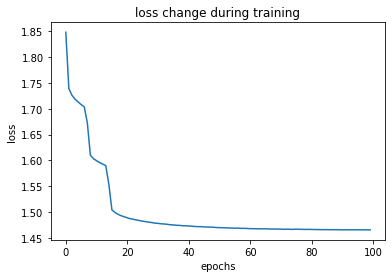

11it [00:00, 102.87it/s]



Evaluating the performance of the model on the test set:


157it [00:01, 103.27it/s]


Test set: Avg. loss: 1.4801, Accuracy: 9811/10000 (98%)



In [11]:
plt.plot(range(len(losses)), losses)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("loss change during training")
plt.show()
print("\n\nEvaluating the performance of the model on the test set:")
evaluate(model, testloader)